# COGS 108 - EDA Checkpoint

## Authors
  
- Evan Ngo: Writer, Background Research
- Leo Wong: Analysis, Software, Visualization  
- David Yu: Writer, Background research  
- Roel Torralba: Writer, Background research

# Research Question

 Across all colleges, are STEM majors disproportionately represented at campuses with a higher proportion of lower income students?


## Background and Prior Work

**Operational definitions:**  
- *Lower income* is defined by Pell Grant distributed aid

# Hypothesis


We predict a strong positive correlation between the proportion of STEM majors and the proportion of pell grant recipients per University of California campus. We will quantify these proportions using a Pearson correlation coefficient and an OLS linear regression (STEM % - PELL %). We will compare the coefficient and regression results from UC-wide campus data with individual UC campuses, performing a permutation test with a p-value of 0.01 to determine significance. 


## Data (Updated)

In [1]:
# Run this code every time when you're actively developing modules in .py files.  It's not needed if you aren't making modules
#
## this code is necessary for making sure that any modules we load are updated here 
## when their source code .py files are modified

%load_ext autoreload
%autoreload 2

In [2]:
# Setup code -- Run only once after cloning!!! 
#
# this code downloads the data from its source to the `data/00-raw/` directory
# if the data hasn't updated you don't need to do this again!

# if you don't already have these packages (you should!) uncomment this line
# %pip install requests tqdm

import sys
sys.path.append('./modules') # this tells python where to look for modules to import

import get_data # this is where we get the function we need to download data

# replace the urls and filenames in this list with your actual datafiles
# yes you can use Google drive share links or whatever
# format is a list of dictionaries; 
# each dict has keys of 
#   'url' where the resource is located
#   'filename' for the local filename where it will be stored 
datafiles = [

{ 
    'url': 'https://drive.google.com/uc?export=download&id=1n4Lw7TohcZKeXrXn_CgRzZW4-3l2WCkc',
    'filename': 'CollegeScorecardDataset.csv',
}
]

get_data.get_raw(datafiles,destination_directory='data/00-raw/')

Overall Download Progress: 100%|██████████| 1/1 [00:04<00:00,  4.77s/it]                   

Successfully downloaded: CollegeScorecardDataset.csv


## Updated Dataset: U.S. Department of Education – College Scorecard (Most Recent Cohort)  
Link to data: https://collegescorecard.ed.gov/data/  

### Dataset Description

We use the U.S. Department of Education College Scorecard – Most Recent Cohorts (Institution-Level) dataset, which contains standardized information on over 6,000 colleges and universities nationwide.    
For our analysis, we extract only the variables directly relevant to our research question: the proportion of students receiving Pell Grants (PCTPELL) and the institutional distribution of degree awards across STEM fields. Pell Grant proportion serves as a widely accepted socioeconomic indicator, as Pell eligibility is strongly tied to low-income status.

To measure how STEM-heavy each institution is, we use College Scorecard’s CIP-based program fields representing the percentage of degrees awarded in specific STEM disciplines: PCIP11 (Computer Science), PCIP14 (Engineering), PCIP15 (Engineering Technologies), PCIP26 (Biological Sciences), PCIP27 (Mathematics/Statistics), PCIP40 (Physical Sciences), and PCIP41 (Science Technologies). These are summed to create a single composite measure (STEM_PCT) indicating the share of total degrees granted in STEM. We restrict the dataset to Bachelor’s degree–granting public institutions using PREDDEG = 3 and CONTROL = 1 to ensure comparability. Additional columns such as INSTNM, STABBR, CITY, UGDS, and MD_EARN_WNE_P10 are retained for context but are not central to the analysis. Together, these processed variables allow us to investigate whether campuses with higher proportions of lower-income students tend to grant a higher or lower percentage of STEM degrees.

## Import + Loading

In [3]:
import pandas as pd
import numpy as np

raw_path = "data/00-raw/CollegeScorecardDataset.csv"
df_raw = pd.read_csv(raw_path)

df_raw.head()

/tmp/ipykernel_3295/3723791489.py:5: DtypeWarning: Columns (9,1407,1408,1431,1432,1532,1537,1538,1539,1540,1542,1546,1589,1601,1602,1606,1608,1611,1614,1615,1616,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1653,1679,1690,1692,1697,1700,1702,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2376,2377,2403,2404,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2958,3215,3231,3235,3236) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(raw_path)


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE1_P11,GT_THRESHOLD_P11,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11,SCORECARD_SECTOR
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,777.0,0.6250,36650.0,41070.0,47016.0,38892.0,41738.0,38167.0,40250.0,4
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,1157.0,0.7588,47182.0,51896.0,54368.0,50488.0,51505.0,46559.0,59181.0,4
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,67.0,0.5986,35752.0,41007.0,NaN,NaN,38467.0,32654.0,49435.0,5
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,uah.clearcostcalculator.com/student/default/ne...,...,802.0,0.7810,51208.0,62219.0,62577.0,55920.0,60221.0,47787.0,67454.0,4
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,tcc.ruffalonl.com/Alabama State University/Fre...,...,1049.0,0.5378,32844.0,36932.0,37966.0,34294.0,31797.0,32303.0,36964.0,4


## Select only Relevant Columns

In [4]:
essential_cols = [
   'UNITID', 'INSTNM', 'STABBR', 'CITY', 'REGION',
    'CONTROL', 'PREDDEG', 'PCTPELL', 'PCTFLOAN',
    'PCIP11', 'PCIP14', 'PCIP15', 'PCIP26', 'PCIP27', 'PCIP40', 'PCIP41',
    'UGDS', 'MD_EARN_WNE_P10',
    'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_2MOR',
]

df = df_raw[essential_cols].copy()
df.head()


,UNITID,INSTNM,STABBR,CITY,REGION,CONTROL,PREDDEG,PCTPELL,PCTFLOAN,PCIP11,...,PCIP27,PCIP40,PCIP41,UGDS,MD_EARN_WNE_P10,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_2MOR
0,100654,Alabama A & M University,AL,Normal,5,1,3,0.6441,0.5859,0.0509,...,0.0098,0.0137,0.0,5726.0,40628.0,0.0180,0.9043,0.0150,0.0017,0.0182
1,100663,University of Alabama at Birmingham,AL,Birmingham,5,1,3,0.3318,0.4097,0.0284,...,0.0046,0.0231,0.0,12118.0,54501.0,0.4832,0.2657,0.0776,0.0915,0.0515
2,100690,Amridge University,AL,Montgomery,5,2,3,0.6842,0.7237,0.0000,...,0.0000,0.0000,0.0,226.0,37621.0,0.2788,0.6681,0.0310,0.0000,0.0000
3,100706,University of Alabama in Huntsville,AL,Huntsville,5,1,3,0.2250,0.3391,0.1010,...,0.0147,0.0514,0.0,6650.0,61767.0,0.6940,0.0907,0.0719,0.0423,0.0508
4,100724,Alabama State University,AL,Montgomery,5,1,3,0.7203,0.7776,0.0568,...,0.0084,0.0126,0.0,3322.0,34502.0,0.0223,0.9082,0.0111,0.0018,0.0126


## Filter Institutions
We keep only:

* Bachelor’s degree–granting institutions (PREDDEG = 3)

* Public colleges/universities (CONTROL = 1)

In [5]:
df = df[
    (df['PREDDEG'] == 3) &
    (df['CONTROL'] == 1)
].copy()

len(df)


600

### Convert STEM Columns to Numeric | Setup STEM Percentage Variable | Convert Pell Grant % to Numeric


In [6]:
stem_cols = ['PCIP11','PCIP14','PCIP15','PCIP26','PCIP27','PCIP40','PCIP41']

for col in stem_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['STEM_PCT'] = df[stem_cols].sum(axis=1, min_count=1)
df['PCTPELL'] = pd.to_numeric(df['PCTPELL'], errors='coerce')


### Data Cleaning

In [7]:
df_analysis = df.dropna(subset=['PCTPELL', 'STEM_PCT'])
len(df_analysis)
df_analysis[['PCTPELL', 'STEM_PCT']].describe()


,PCTPELL,STEM_PCT
count,595.000000,595.000000
mean,0.347797,0.196676
std,0.143365,0.142166
min,0.000000,0.000000
25%,0.245050,0.105000
50%,0.331000,0.169200
75%,0.422750,0.252900
max,0.857100,0.995800


## Save Code into processed

In [8]:
import os
output_path = "data/02-processed/college_scorecard_processed.csv"
df.to_csv(output_path, index=False)

print(f"Processed dataset saved to: {output_path}")

Processed dataset saved to: data/02-processed/college_scorecard_processed.csv


## Results

### Exploratory Data Analysis

##### What We're Investigating:
We want to know if there's a relationship between:
- **Pell Grant %** (our measure of how many low-income students attend) 
- **STEM %** (what proportion of degrees are in STEM fields)

#### Our Data
We're using the College Scorecard dataset, filtered to **public, bachelor's-degree-granting institutions** (n ≈ 595 schools).



#### Section 1 of EDA 


In [9]:
# Setup - import libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Make plots look nice
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

### Load Processed Data

We load the fully wrangled dataset from `data/02-processed/`.

In [10]:
# Load the data
DATA_PATH = 'data/02-processed/college_scorecard_processed.csv'

df_raw = pd.read_csv(DATA_PATH, low_memory=False)

# Filter to public, bachelor's-degree-granting schools
df = df_raw[(df_raw['PREDDEG'] == 3) & (df_raw['CONTROL'] == 1)].copy()

# Define STEM fields (these are the CIP code columns in the data)
stem_cols = ['PCIP11', 'PCIP14', 'PCIP15', 'PCIP26', 'PCIP27', 'PCIP40', 'PCIP41']

# Convert to numeric
df['PCTPELL'] = pd.to_numeric(df['PCTPELL'], errors='coerce')
for col in stem_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Create total STEM percentage (sum of all STEM fields)
df['STEM_PCT'] = df[stem_cols].sum(axis=1)

# Drop rows with missing data in our key variables
df = df.dropna(subset=['PCTPELL', 'STEM_PCT'])

print(f"Dataset ready: {len(df)} institutions")

Dataset ready: 595 institutions


---

## Section 1: Understanding Our Variables

Before looking for relationships, let's understand what our two main variables look like.

In [11]:
# Basic statistics for our two main variables
print("=" * 50)
print("PELL GRANT % (measure of low-income students)")
print("=" * 50)
print(f"Mean:   {df['PCTPELL'].mean() * 100:.1f}%")
print(f"Median: {df['PCTPELL'].median() * 100:.1f}%")
print(f"Min:    {df['PCTPELL'].min() * 100:.1f}%")
print(f"Max:    {df['PCTPELL'].max() * 100:.1f}%")

print("\n" + "=" * 50)
print("STEM % (proportion of degrees in STEM)")
print("=" * 50)
print(f"Mean:   {df['STEM_PCT'].mean() * 100:.1f}%")
print(f"Median: {df['STEM_PCT'].median() * 100:.1f}%")
print(f"Min:    {df['STEM_PCT'].min() * 100:.1f}%")
print(f"Max:    {df['STEM_PCT'].max() * 100:.1f}%")

PELL GRANT % (measure of low-income students)
Mean:   34.8%
Median: 33.1%
Min:    0.0%
Max:    85.7%

STEM % (proportion of degrees in STEM)
Mean:   19.7%
Median: 16.9%
Min:    0.0%
Max:    99.6%


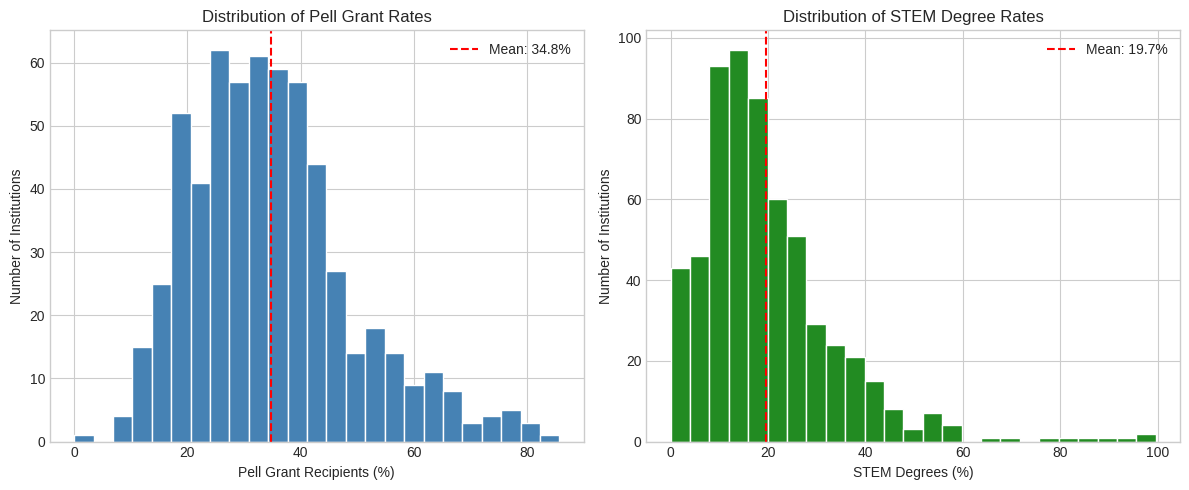

In [12]:
# Visualize the distributions with histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pell Grant distribution
axes[0].hist(df['PCTPELL'] * 100, bins=25, color='steelblue', edgecolor='white')
axes[0].axvline(df['PCTPELL'].mean() * 100, color='red', linestyle='--', 
                label=f'Mean: {df["PCTPELL"].mean()*100:.1f}%')
axes[0].set_xlabel('Pell Grant Recipients (%)')
axes[0].set_ylabel('Number of Institutions')
axes[0].set_title('Distribution of Pell Grant Rates')
axes[0].legend()

# STEM distribution
axes[1].hist(df['STEM_PCT'] * 100, bins=25, color='forestgreen', edgecolor='white')
axes[1].axvline(df['STEM_PCT'].mean() * 100, color='red', linestyle='--',
                label=f'Mean: {df["STEM_PCT"].mean()*100:.1f}%')
axes[1].set_xlabel('STEM Degrees (%)')
axes[1].set_ylabel('Number of Institutions')
axes[1].set_title('Distribution of STEM Degree Rates')
axes[1].legend()

plt.tight_layout()
plt.show()

### What do these distributions tell us?

- **Pell Grant %**: Most schools have between 20-50% Pell recipients, with the average around 35%
- **STEM %**: Most schools have 10-30% STEM degrees, but some specialized schools go much higher
- The STEM distribution is "right-skewed" (has a long tail to the right)

---

## Section 2: Exploring the Relationship

Now let's see if there's a relationship between Pell Grant rates and STEM degree rates.

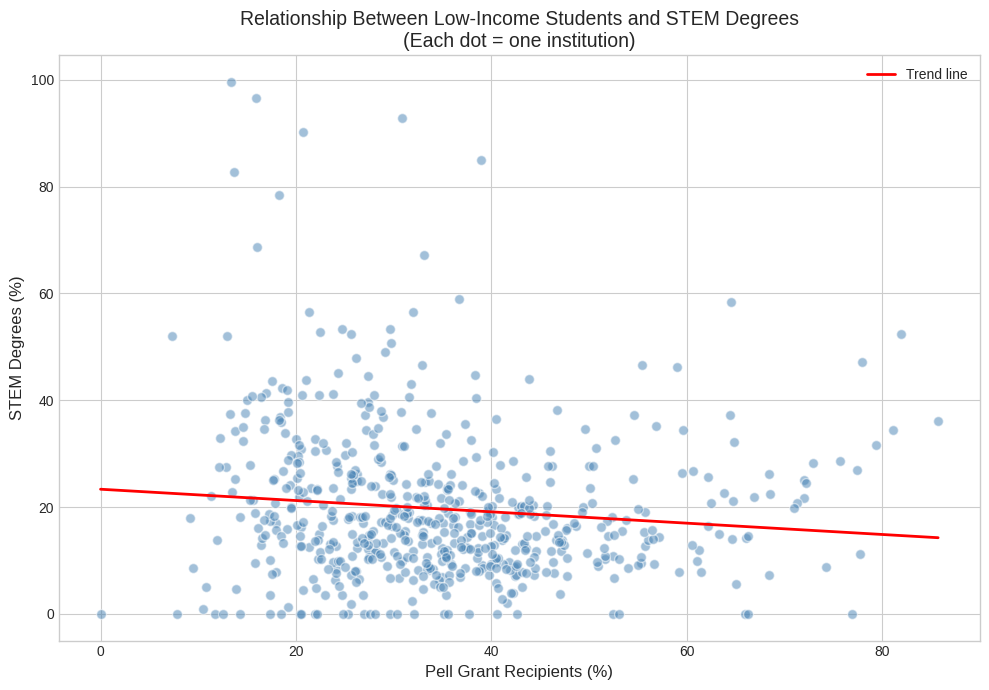

In [13]:
# Scatterplot - the most important visualization
plt.figure(figsize=(10, 7))

plt.scatter(df['PCTPELL'] * 100, df['STEM_PCT'] * 100, 
            alpha=0.5, color='steelblue', edgecolors='white', s=50)

# Add a trend line
z = np.polyfit(df['PCTPELL'], df['STEM_PCT'], 1)
p = np.poly1d(z)
x_line = np.linspace(df['PCTPELL'].min(), df['PCTPELL'].max(), 100)
plt.plot(x_line * 100, p(x_line) * 100, color='red', linewidth=2, label='Trend line')

plt.xlabel('Pell Grant Recipients (%)', fontsize=12)
plt.ylabel('STEM Degrees (%)', fontsize=12)
plt.title('Relationship Between Low-Income Students and STEM Degrees\n(Each dot = one institution)', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

### What does the scatterplot show?

The trend line slopes **downward**, suggesting that schools with more low-income students tend to have **fewer** STEM degrees. But is this relationship statistically significant? Let's calculate the correlation.

In [14]:
# Calculate correlation
r, p_value = stats.pearsonr(df['PCTPELL'], df['STEM_PCT'])

print("=" * 50)
print("CORRELATION ANALYSIS")
print("=" * 50)
print(f"\nPearson correlation (r): {r:.3f}")
print(f"P-value: {p_value:.4f}")
print(f"\nR-squared: {r**2:.3f} ({r**2*100:.1f}% of variance explained)")

# Interpret the results
print("\n" + "=" * 50)
print("INTERPRETATION")
print("=" * 50)

# Direction
if r > 0:
    print(f"\nDirection: POSITIVE (higher Pell % → higher STEM %)")
else:
    print(f"\nDirection: NEGATIVE (higher Pell % → lower STEM %)")

# Strength
if abs(r) < 0.1:
    strength = "negligible"
elif abs(r) < 0.3:
    strength = "weak"
elif abs(r) < 0.5:
    strength = "moderate"
else:
    strength = "strong"
print(f"Strength: {strength.upper()} (|r| = {abs(r):.3f})")

# Statistical significance
if p_value < 0.01:
    print(f"Significance: YES (p < 0.01) - unlikely due to chance")
elif p_value < 0.05:
    print(f"Significance: YES (p < 0.05) - unlikely due to chance")
else:
    print(f"Significance: NO (p = {p_value:.3f}) - could be due to chance")

CORRELATION ANALYSIS

Pearson correlation (r): -0.107
P-value: 0.0091

R-squared: 0.011 (1.1% of variance explained)

INTERPRETATION

Direction: NEGATIVE (higher Pell % → lower STEM %)
Strength: WEAK (|r| = 0.107)
Significance: YES (p < 0.01) - unlikely due to chance


---

## Section 3: Breaking Down by Income Level

To make the relationship clearer, let's group schools into three categories based on their Pell Grant rates and compare their STEM percentages.

In [15]:
# Divide schools into three groups based on Pell Grant rates
df['Income_Group'] = pd.qcut(df['PCTPELL'], q=3, 
                              labels=['Low Pell (Higher Income)', 
                                      'Medium Pell', 
                                      'High Pell (Lower Income)'])

# Calculate mean STEM % for each group
group_stats = df.groupby('Income_Group')['STEM_PCT'].agg(['mean', 'count']).reset_index()
group_stats.columns = ['Group', 'Mean STEM %', 'Count']
group_stats['Mean STEM %'] = group_stats['Mean STEM %'] * 100

print("STEM Degrees by Income Group")
print("=" * 50)
for _, row in group_stats.iterrows():
    print(f"{row['Group']:30s}: {row['Mean STEM %']:.1f}% STEM (n={int(row['Count'])})")

STEM Degrees by Income Group
Low Pell (Higher Income)      : 22.9% STEM (n=199)
Medium Pell                   : 18.8% STEM (n=197)
High Pell (Lower Income)      : 17.3% STEM (n=199)


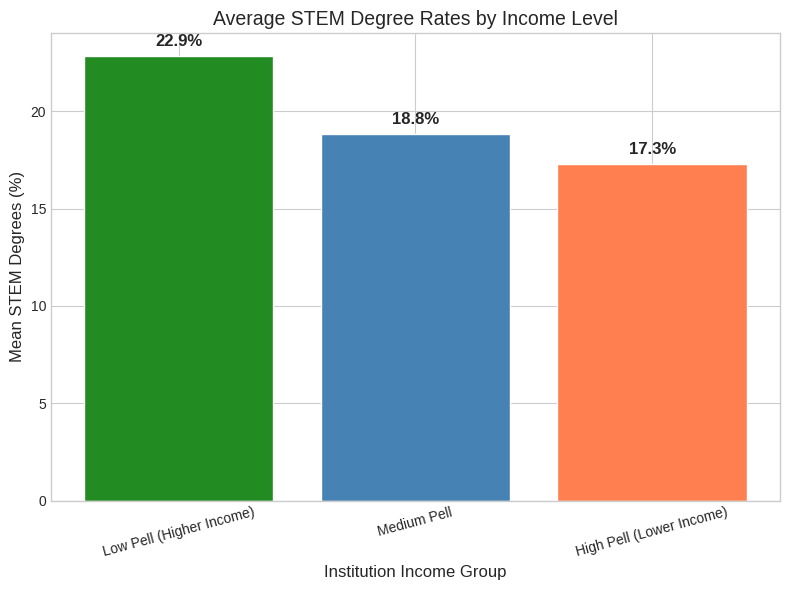

In [16]:
# Visualize with a bar chart
plt.figure(figsize=(8, 6))

colors = ['forestgreen', 'steelblue', 'coral']
bars = plt.bar(group_stats['Group'], group_stats['Mean STEM %'], color=colors, edgecolor='white')

# Add value labels on bars
for bar, val in zip(bars, group_stats['Mean STEM %']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{val:.1f}%', ha='center', fontsize=12, fontweight='bold')

plt.xlabel('Institution Income Group', fontsize=12)
plt.ylabel('Mean STEM Degrees (%)', fontsize=12)
plt.title('Average STEM Degree Rates by Income Level', fontsize=14)
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

In [17]:
# Is this difference statistically significant? (ANOVA test)
groups = [df[df['Income_Group'] == g]['STEM_PCT'] for g in df['Income_Group'].unique()]
f_stat, p_value = stats.f_oneway(*groups)

print("ANOVA Test: Are the group means significantly different?")
print("=" * 50)
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("\n→ YES, the differences between groups are statistically significant")
else:
    print("\n→ NO, the differences could be due to chance")

ANOVA Test: Are the group means significantly different?
F-statistic: 8.33
P-value: 0.0003

→ YES, the differences between groups are statistically significant


### Key Finding: NEGATIVE Correlation (Opposite of Original Hypothesis)

| Finding | Value | Interpretation |
|---------|-------|----------------|
| Pearson r | **-0.107** | Small negative linear correlation |
| Spearman ρ | **-0.136** | Small negative monotonic correlation |
| p-value | **< 0.01** | Statistically significant |
| R² | **1.14%** | Very little variance explained |

**Interpretation:** Institutions with MORE low-income students tend to have LOWER proportions of STEM degrees.

---

## Section 4: Summary of Findings

### What did we find?

In [18]:
# Final summary
r, p_value = stats.pearsonr(df['PCTPELL'], df['STEM_PCT'])

print("="*60)
print("EDA SUMMARY")
print("="*60)

print(f"\nDataset: {len(df)} public bachelor's-granting institutions")

print(f"\n--- Main Finding ---")
print(f"Correlation between Pell % and STEM %: r = {r:.3f}")
print(f"This is a {'NEGATIVE' if r < 0 else 'POSITIVE'}, {'weak' if abs(r) < 0.3 else 'moderate'} correlation")
print(f"Statistically significant: {'Yes' if p_value < 0.05 else 'No'} (p = {p_value:.4f})")

print(f"\n--- What this means ---")
if r < 0:
    print("Schools with MORE low-income students tend to have FEWER STEM degrees.")
    print("This is the OPPOSITE of our original hypothesis.")
else:
    print("Schools with MORE low-income students tend to have MORE STEM degrees.")
    print("This SUPPORTS our original hypothesis.")

print(f"\n--- Important caveat ---")
print(f"The effect is small (R² = {r**2:.3f}), meaning Pell Grant rate only")
print(f"explains {r**2*100:.1f}% of the variation in STEM degree rates.")
print("Many other factors influence STEM degree production.")

EDA SUMMARY

Dataset: 595 public bachelor's-granting institutions

--- Main Finding ---
Correlation between Pell % and STEM %: r = -0.107
This is a NEGATIVE, weak correlation
Statistically significant: Yes (p = 0.0091)

--- What this means ---
Schools with MORE low-income students tend to have FEWER STEM degrees.
This is the OPPOSITE of our original hypothesis.

--- Important caveat ---
The effect is small (R² = 0.011), meaning Pell Grant rate only
explains 1.1% of the variation in STEM degree rates.
Many other factors influence STEM degree production.


---

## Section 7: EDA Summary

### Key Findings

1. **Primary Relationship**: Small negative correlation (r = -0.107, p < 0.01)
2. **Direction**: Opposite of original hypothesis

---

## Implications for Our Hypothesis

**Original hypothesis:** We predicted a positive correlation between Pell Grant % and STEM %.

**What we found:** The correlation is actually **negative** (r ≈ -0.11). Schools with higher proportions of low-income students tend to have slightly lower STEM degree rates.

**However:** The effect is weak, so this relationship alone doesn't tell the whole story. Other factors (like school size, location, and resources) likely play important roles.

### Next Steps
1. Run a regression analysis controlling for other variables
2. Perform a permutation test to confirm significance
3. Consider looking at individual STEM fields separately

## Ethics

**Instructions:** Keep the contents of this cell. For each item on the checklist, put an `X` if you've considered the item. **If the item is relevant**, add a short paragraph after the checklist item discussing the issue. Items here are to provoke discussion among good-faith actors who take their ethical responsibilities seriously. Document these discussions and decisions. You don't have to solve these problems; just acknowledge potential harm, no matter how unlikely.  

A. **Data Collection**

- [ ] **A.1 Informed consent:** If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?  
  There are no direct human subject interactions for this data. The Common Data Set for each University of California campus is aggregated and anonymous, so informed consent is not required.

- [ ] **A.2 Collection bias:** Have we considered sources of bias introduced during data collection/survey design and taken steps to mitigate those?  
  We acknowledge that the CDS for each campus is self-reported and may contain inconsistencies across campuses. To mitigate this, we will use clearly defined and comparable data (e.g., percentages receiving need-based aid).

- [ ] **A.3 Limit PII exposure:** Have we considered ways to minimize exposure of personally identifiable information (PII)?  
  The CDS contains no PII.

- [ ] **A.4 Downstream bias mitigation:** Have we considered ways to test downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?  
  We will avoid causal framing and focus on representation patterns across UC campuses. Findings will be framed with respect to structural and systemic factors.

B. **Data Storage**

- [ ] **B.1 Data security:** Plan to protect and secure data?  
  We plan to store data locally and on a private GitHub repository. Since the data are public and contain no PII, heavy security measures are not necessary.

- [ ] **B.2 Right to be forgotten:** Mechanism for removal requests?  
  Not applicable; we are not collecting data directly.

- [ ] **B.3 Data retention plan:** Schedule or plan to delete data after it is no longer needed?  
  _[Team to define a retention policy for archival or deletion after course completion.]_

C. **Analysis**

- [ ] **C.1 Missing perspectives:** Have we sought to address blind spots by engaging stakeholders/experts?  
  Our analysis focuses on quantitative metrics and may capture only part of the story. We acknowledge broader social factors likely influence STEM major selection.

- [ ] **C.2 Dataset bias:** Have we examined the data for possible sources of bias and taken steps to mitigate?  
  Biases may arise from misreported numbers. We will sanity-check values and investigate outliers.

- [ ] **C.3 Honest representation:** Are visualizations and summaries designed to honestly represent the underlying data?  
  _[Commit to clear scales, labeled axes, and context for comparisons.]_

- [ ] **C.4 Privacy in analysis:** Ensure data with PII are not used or displayed unless necessary?  
  No PII involved.

- [ ] **C.5 Auditability:** Is the analysis process well documented and reproducible?  
  _[Maintain scripts/notebooks; track data sources and transforms.]_

D. **Modeling** _(if applicable)_

- [ ] **D.1 Proxy discrimination:** Avoid variables/proxies that are unfairly discriminatory.  
- [ ] **D.2 Fairness across groups:** Test results for disparate error rates.  
- [ ] **D.3 Metric selection:** Consider the effects of optimizing chosen metrics and evaluate alternatives.  
- [ ] **D.4 Explainability:** Ensure decisions are explainable in understandable terms.  
- [ ] **D.5 Communicate limitations:** Clearly communicate shortcomings, limitations, and biases.

E. **Deployment** _(if applicable)_

- [ ] **E.1 Monitoring and evaluation:** Plan to monitor model and impacts post-deployment.  
- [ ] **E.2 Redress:** Discuss a plan for response if users are harmed by results.  
- [ ] **E.3 Roll back:** Ability to turn off/roll back the model in production if necessary.  
- [ ] **E.4 Unintended use:** Identify and prevent unintended uses/abuses; plan to monitor.

## Team Expectations 

- **Communications / Meetings:**  
  Meetings will be held on Google Meet using the same posted link each time. Communication between members will happen in the group text chat, which is mainly used for announcements, concerns, and plans related to this project.

- **Group Norms:**  
  Tone should always be respectful. If a disagreement occurs, both sides will present their case, and the group will work toward a solution that addresses both perspectives through productive discussion.

- **Group Decisions:**  
  Decisions are made through a group vote from each member. If a disagreement occurs, refer back to the Group Norms. If time constraints prevent everyone from responding, the vote or discussion will proceed with the members who are currently present.

- **Contributions / Tasks:**  
  Before starting work (including before and during meetings), the group will outline the current work plan and discuss who will do what based on each member’s strengths and weaknesses. Work should be distributed as equally as possible, or make-up work will be assigned later in the project if needed.

- **Member Expectations:**  
  Members are expected to complete their assigned tasks (independently or with help from another member), and should communicate if they are struggling or have outside conflicts that affect their work. Refer to the Contributions / Tasks section for additional details.


## Project Timeline Proposal

| Meeting Date | Meeting Time    | Completed Before Meeting                                              | Discuss at Meeting                                                                                                             |
| ------------ | --------------- | --------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------ |
| 1/20         | 1 PM            | Read & Think about COGS 108 expectations; brainstorm topics/questions | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research |
| 1/26         | 10 AM           | Do background research on topic                                       | Discuss ideal dataset(s) and ethics; draft project proposal                                                                    |
| 2/1          | 10 AM           | Edit, finalize, and submit proposal; Search for datasets              | Discuss wrangling and possible analytical approaches; Assign group members to lead each specific part                          |
| 2/14         | 6 PM            | Import & Wrangle Data (Ant Man); EDA (Hulk)                           | Review/Edit wrangling/EDA; Discuss Analysis Plan                                                                               |
| 2/23         | 12 PM           | Finalize wrangling/EDA; Begin Analysis (Iron Man; Thor)               | Discuss/edit Analysis; Complete project check-in                                                                               |
| 3/13         | 12 PM           | Complete analysis; Draft results/conclusion/discussion (Wasp)         | Discuss/edit full project                                                                                                      |
| 3/20         | Before 11:59 PM | NA                                                                    | Turn in Final Project & Group Project Surveys                                                                                  |
